# TW5


## A simple classification task with Naive Bayes classifier & ROC curve

## Part 0:

Read and run each cell of the example. 

### Setup

In [54]:
%matplotlib notebook
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import seaborn as sn
import os

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."

CHAPTER_ID = 'Naive Bayesian'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
load_breast_cancer

<function sklearn.datasets._base.load_breast_cancer(*, return_X_y=False, as_frame=False)>

### 1. Sythetic Datasets

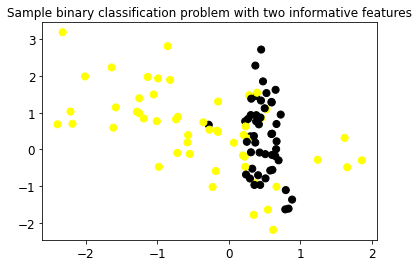

In [55]:
# synthetic dataset for classification (binary)

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

plt.figure()
plt.title('Sample binary classification problem with two informative features')

X, y = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

plt.scatter(X[:, 0], X[:, 1], marker= 'o', c=y, s=50, cmap=cmap_bold)
plt.show()

## Naive Bayes classifiers

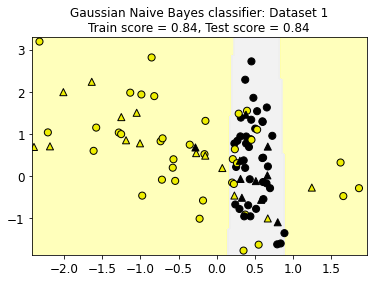

In [56]:
from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)

plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test,
                                 'Gaussian Naive Bayes classifier: Dataset 1')

In [57]:
nbclf.score(X_test, y_test)

0.84

In [58]:
y_pred = nbclf.predict(X_test)

# plot a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print(confusion_mat)

[[12  3]
 [ 1  9]]


In [59]:
# Print classification report
target_names = ['Class 0', 'Class 1']

result_metrics = classification_report(y_test, y_pred, target_names=target_names)

print(result_metrics)

              precision    recall  f1-score   support

     Class 0       0.92      0.80      0.86        15
     Class 1       0.75      0.90      0.82        10

    accuracy                           0.84        25
   macro avg       0.84      0.85      0.84        25
weighted avg       0.85      0.84      0.84        25



## ROC Curve

Accuracy =  0.8600000000000001


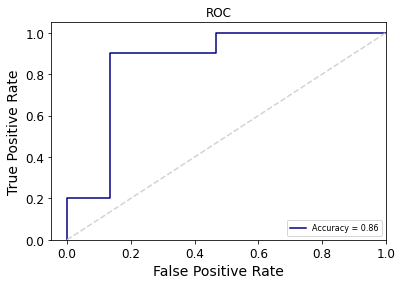

In [60]:
from sklearn.metrics import roc_curve, auc
y_score = nbclf.predict_proba(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score[:,1])

roc_auc = auc(false_positive_rate, true_positive_rate)
print('Accuracy = ', roc_auc)

count = 1

# Get different color each graph line
colorSet = ['navy', 'greenyellow', 'deepskyblue', 'darkviolet', 'crimson', 
            'darkslategray', 'indigo', 'brown', 'orange', 'palevioletred', 'mediumseagreen',
            'k', 'darkgoldenrod', 'g', 'midnightblue', 'c', 'y', 'r', 'b', 'm', 'lawngreen'
            'mediumturquoise', 'lime', 'teal', 'drive', 'sienna', 'sandybrown']
color = colorSet[count-1]

# Plotting
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, c=color, label=('Accuracy = %0.2f'%roc_auc))
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 2. Application to a real-world dataset¶

- Breast Canver dataset


In [61]:
# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

print(X_cancer)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [62]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_cancer, y_cancer, random_state = 0)

nbclf = GaussianNB().fit(X_train2, y_train2)

print('Breast cancer dataset')
print('Accuracy of GaussianNB classifier on training set: {:.2f}'
     .format(nbclf.score(X_train2, y_train2)))

print('Accuracy of GaussianNB classifier on test set: {:.2f}'
     .format(nbclf.score(X_test2, y_test2)))

Breast cancer dataset
Accuracy of GaussianNB classifier on training set: 0.95
Accuracy of GaussianNB classifier on test set: 0.94


### accuracy in training dataset

In [63]:
y_pred2 = nbclf.predict(X_train2)


target_names = list(cancer.target_names)
# plot a confusion matrix
confusion_mat = confusion_matrix(y_train2, y_pred2)

print(confusion_mat)

# Print classification report


result_metrics = classification_report(y_train2, y_pred2, target_names=target_names)

print(result_metrics)

[[142  17]
 [  4 263]]
              precision    recall  f1-score   support

   malignant       0.97      0.89      0.93       159
      benign       0.94      0.99      0.96       267

    accuracy                           0.95       426
   macro avg       0.96      0.94      0.95       426
weighted avg       0.95      0.95      0.95       426



### accuracy in testing dataset

In [64]:
y_pred2 = nbclf.predict(X_test2)


target_names = list(cancer.target_names)

# plot a confusion matrix
print(confusion_mat)

# Print classification report
result_metrics = classification_report(y_test2, y_pred2, target_names=target_names)

print(result_metrics)

[[142  17]
 [  4 263]]
              precision    recall  f1-score   support

   malignant       0.92      0.91      0.91        53
      benign       0.95      0.96      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



### ROC Curve

Accuracy =  0.990146750524109


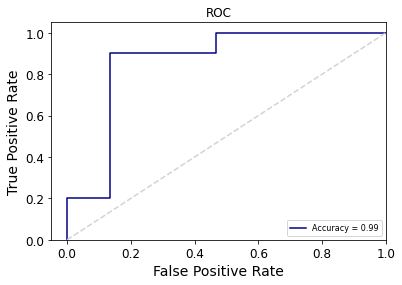

In [65]:
from sklearn.metrics import roc_curve, auc
y_score2 = nbclf.predict_proba(X_test2)

false_positive_rate2, true_positive_rate2, thresholds = roc_curve(y_test2, y_score2[:,1])

roc_auc2 = auc(false_positive_rate2, true_positive_rate2)
print('Accuracy = ', roc_auc2)

count = 1

# Get different color each graph line
colorSet = ['navy', 'greenyellow', 'deepskyblue', 'darkviolet', 'crimson', 
            'darkslategray', 'indigo', 'brown', 'orange', 'palevioletred', 'mediumseagreen',
            'k', 'darkgoldenrod', 'g', 'midnightblue', 'c', 'y', 'r', 'b', 'm', 'lawngreen'
            'mediumturquoise', 'lime', 'teal', 'drive', 'sienna', 'sandybrown']
color = colorSet[count-1]

# Plotting
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, c=color, label=('Accuracy = %0.2f'%roc_auc2))
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## TW5 Tasks

## Part 1

- Dataset: iris.csv is stored in a folder data



In [66]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
iris_data = iris.data[:, :]
iris_target = iris.target[:]
iris_data_df = pd.DataFrame(iris.data[:],
                   columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
iris_target_df = pd.DataFrame(iris.target[:],
                   columns=['Types'])

- Your modeling analysis should be done on two different datasets, (1) the original dataset and (b) Normalized data using min-max normalization. 

In [67]:
print(type(iris_data_df))

<class 'pandas.core.frame.DataFrame'>


In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
iris_scaler = scaler.fit_transform(iris_data_df)

In [69]:
iris_scalar_data_df = pd.DataFrame(iris_scaler,
                   columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
print(type(iris_scalar_data_df))

<class 'pandas.core.frame.DataFrame'>


In [70]:
print('means : ', iris_scaler.mean(axis=0))
print('std : ', iris_scaler.std(axis=0))

means :  [0.4287037  0.44055556 0.46745763 0.45805556]
std :  [0.22925036 0.18100457 0.29820408 0.31653859]


In [71]:
print('Min : ', iris_scaler.min(axis=0))
print('Max : ', iris_scaler.max(axis=0))

Min :  [0. 0. 0. 0.]
Max :  [1. 1. 1. 1.]


- Apply (1) Naive Bayes classifiers 

In [72]:
from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier

X = iris_data_df.iloc[:,:4].values
y = iris_target

y = np.transpose(y)

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [73]:
X_normal = iris_scalar_data_df.iloc[:,:4].values
y_normal = iris_target
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)
nbclf = GaussianNB().fit(X_train, y_train)

In [75]:
from sklearn.model_selection import train_test_split
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_normal, y_normal, test_size = 0.20, random_state = 82)
nbclf_normal = GaussianNB().fit(X_train_normal, y_train_normal)

In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [77]:
from sklearn.preprocessing import StandardScaler
sc_normal = StandardScaler()
X_train_normal = sc_normal.fit_transform(X_train_normal)
X_test_normal = sc_normal.transform(X_test_normal)

In [78]:
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [79]:
from sklearn.naive_bayes import GaussianNB
nvclassifier_normal = GaussianNB()
nvclassifier_normal.fit(X_train_normal, y_train_normal)

GaussianNB()

In [80]:
y_pred = nvclassifier.predict(X_test)
print(y_pred)

[2 2 0 0 0 2 1 1 1 1 1 2 0 0 0 0 2 1 0 1 0 2 0 2 2 1 2 0 2 1]


In [81]:
y_pred_normal = nvclassifier_normal.predict(X_test_normal)
print(y_pred_normal)

[2 2 0 0 0 2 1 1 1 1 1 2 0 0 0 0 2 1 0 1 0 2 0 2 2 1 2 0 2 1]


In [82]:
#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:5,:]

array([[2, 2],
       [2, 2],
       [0, 0],
       [0, 0],
       [0, 0]])

In [83]:
#lets see the actual and predicted value side by side
y_compare_normal = np.vstack((y_test_normal,y_pred_normal)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare_normal[:5,:]

array([[2, 2],
       [2, 2],
       [0, 0],
       [0, 0],
       [0, 0]])

In [84]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  0  0]
 [ 0  8  1]
 [ 0  1  9]]


In [85]:
from sklearn.metrics import confusion_matrix
cm_normal = confusion_matrix(y_test_normal, y_pred_normal)
print(cm_normal)

[[11  0  0]
 [ 0  8  1]
 [ 0  1  9]]


In [86]:
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum()))

Correct predictions:  28
False predictions 2


Accuracy of the Naive Bayes Clasification is:  0.9333333333333333


In [87]:
#finding accuracy from the confusion matrix.
a_normal = cm_normal.shape
corrPred_normal = 0
falsePred_normal = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred_normal +=cm_normal[row,c]
        else:
            falsePred_normal += cm_normal[row,c]
print('Correct predictions: ', corrPred_normal)
print('False predictions', falsePred_normal)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred_normal/(cm_normal.sum()))

Correct predictions:  28
False predictions 2


Accuracy of the Naive Bayes Clasification is:  0.9333333333333333


- A framework of k-cross validation (k = 10)


In [88]:
from sklearn.model_selection import KFold # import k-fold validation

kf = KFold(n_splits=10, random_state=None, shuffle=True) # Define the split - into 2 folds 

kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

print(kf) 

KFold(n_splits=10, random_state=None, shuffle=True)


In [89]:
from sklearn.model_selection import KFold # import k-fold validation

kf_normal = KFold(n_splits=10, random_state=None, shuffle=True) # Define the split - into 2 folds 

kf_normal.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

print(kf_normal) 

KFold(n_splits=10, random_state=None, shuffle=True)


- Display confusion matrix (a matrix with numbers)
- Print a summary of performance metrics

In [90]:
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    confusion_mat = confusion_matrix(y_test, y_pred)
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    nvclassifier.fit(X_train, y_train)
    
    y_pred = nvclassifier.predict(X_test)
    
    # Print classification report
    target_names = iris.target_names
    print(classification_report(y_test, y_pred, target_names=target_names))
    print(confusion_mat)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       1.00      1.00      1.00         6
   virginica       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

[[11  0  0]
 [ 0  8  1]
 [ 0  1  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         4
  versicolor       1.00      1.00      1.00         3
   virginica       1.00      1.00      1.00         8

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

[[6 0 0]
 [0 6 0]
 [0 0 3]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      1.00      1.00         4
   virgini

In [91]:
for train_index_normal, test_index_normal in kf_normal.split(X_normal):
    #print("TRAIN:", train_index, "TEST:", test_index)
    confusion_mat_normal = confusion_matrix(y_test_normal, y_pred_normal)
    
    X_train_normal, X_test_normal = X_normal[train_index_normal], X[test_index_normal]
    y_train_normal, y_test_normal = y_normal[train_index_normal], y[test_index_normal]
    
    nvclassifier_normal.fit(X_train_normal, y_train_normal)
    
    y_pred_normal = nvclassifier_normal.predict(X_test_normal)
    
    # Print classification report
    target_names_normal = iris.target_names
    print(classification_report(y_test_normal, y_pred_normal, target_names=target_names_normal))
    print(confusion_mat_normal)

              precision    recall  f1-score   support

      setosa       0.00      0.00      0.00         7
  versicolor       0.00      0.00      0.00         2
   virginica       0.40      1.00      0.57         6

    accuracy                           0.40        15
   macro avg       0.13      0.33      0.19        15
weighted avg       0.16      0.40      0.23        15

[[11  0  0]
 [ 0  8  1]
 [ 0  1  9]]
              precision    recall  f1-score   support

      setosa       0.00      0.00      0.00         7
  versicolor       0.00      0.00      0.00         4
   virginica       0.27      1.00      0.42         4

    accuracy                           0.27        15
   macro avg       0.09      0.33      0.14        15
weighted avg       0.07      0.27      0.11        15

[[0 0 7]
 [0 0 2]
 [0 0 6]]
              precision    recall  f1-score   support

      setosa       0.00      0.00      0.00         4
  versicolor       0.00      0.00      0.00         6
   virgini

/Users/sunflower/opt/anaconda3/envs/python3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sunflower/opt/anaconda3/envs/python3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sunflower/opt/anaconda3/envs/python3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

- Plot ROC curves

In [92]:
from sklearn.metrics import roc_curve, auc
y_score = nbclf.predict_proba(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score[:,1])

roc_auc = auc(false_positive_rate, true_positive_rate)
print('Accuracy = ', roc_auc)

count = 1

# Get different color each graph line
colorSet = ['navy', 'greenyellow', 'deepskyblue', 'darkviolet', 'crimson', 
            'darkslategray', 'indigo', 'brown', 'orange', 'palevioletred', 'mediumseagreen',
            'k', 'darkgoldenrod', 'g', 'midnightblue', 'c', 'y', 'r', 'b', 'm', 'lawngreen'
            'mediumturquoise', 'lime', 'teal', 'drive', 'sienna', 'sandybrown']
color = colorSet[count-1]

# Plotting
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, c=color, label=('Accuracy = %0.2f'%roc_auc))
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ValueError: multiclass format is not supported

### Submissions

- Upload your notebook on GitHub repo and provide an URL to the file.

- Write a summary of the analysis and submit it to Canvas. Your summary should include the comparisons of the two models and the model peformance based on parameters (e.g., k value in k-NN classifier).
